In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
df=pd.read_csv("C:\\gitsdt\\height-weight.csv")

In [17]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


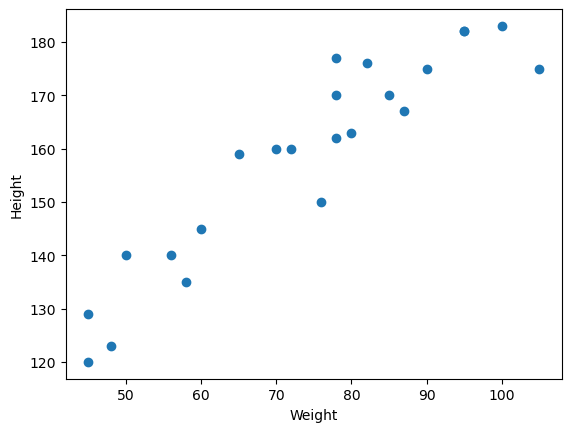

In [25]:
plt.scatter(df.Weight,df.Height)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [27]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


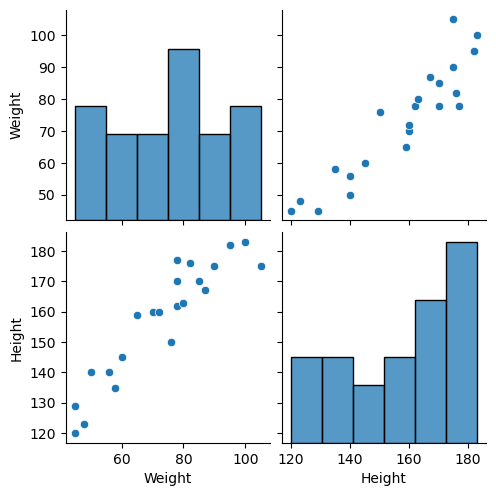

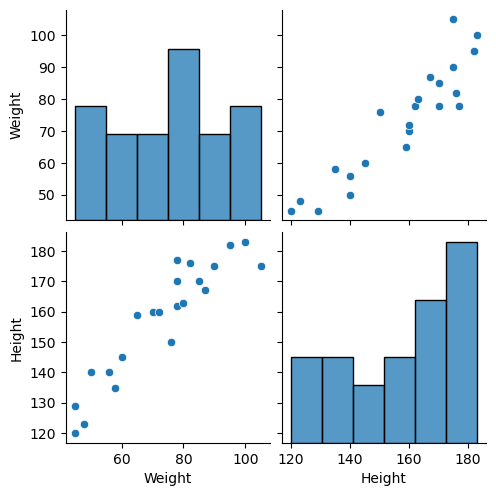

In [37]:
sns.pairplot(df)
plt.show()

## Features

In [44]:
df.columns

Index(['Weight', 'Height'], dtype='object')

In [46]:
x=df[['Weight']]

In [48]:
y=df['Height']

In [50]:
type(x)

pandas.core.frame.DataFrame

In [52]:
type(y)

pandas.core.series.Series

In [56]:
x.shape

(23, 1)

## Train Test Split

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=40)

In [65]:
X_train.shape

(17, 1)

In [67]:
y_train.shape

(17,)

## Standardization

In [70]:
from sklearn.preprocessing import StandardScaler

In [72]:
scalar=StandardScaler()

In [74]:
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [76]:
## Apply Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression

In [80]:
model1=LinearRegression(n_jobs=-1)

In [84]:
model1.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [86]:
model1.coef_  # Slop B1

array([18.57597457])

In [88]:
model1.intercept_  # Intercept B0

154.23529411764707

## With Respect to training data plot best fit line

C:\Users\A\AppData\Local\Temp\ipykernel_20536\122772473.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


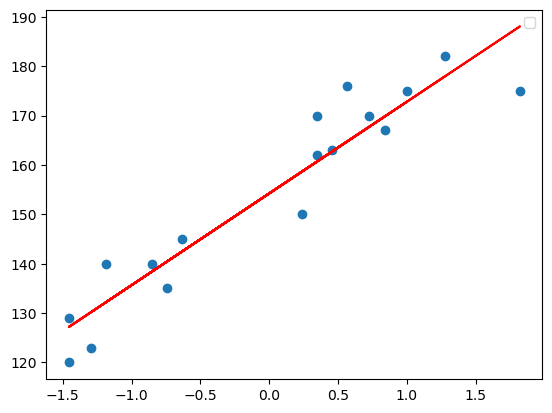

In [97]:
plt.scatter(X_train,y_train)
plt.plot(X_train,model1.predict(X_train),color='r')
plt.legend()
plt.show()

## Prediction for test data

In [100]:
y_pred=model1.predict(X_test)

## Performance Metrics

In [105]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)

In [113]:
print('mean_absolute_error : ',mae)
print('mean_squared_error : ',mse)
print('Root_mean_squared_error : ',rmse)
print('r2_score :',r2)


mean_absolute_error :  7.457487942647584
mean_squared_error :  83.3140346124661
Root_mean_squared_error :  9.127652196072443
r2_score : 0.26792647155265337


In [115]:
n=len(y_test)

In [123]:
k=X_test.shape[1]

In [125]:
k

1

In [127]:
r2_adj = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [129]:
r2_adj

0.08490808944081674

## OLS

In [132]:
import statsmodels.api as sm

In [170]:
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [172]:
model2 = sm.OLS(y_train, X_train_sm).fit()

In [176]:
y_pred1=model2.predict(X_test_sm)

In [178]:
y_pred1

array([154.59334558, 147.49199158, 177.92636587, 160.68022044,
       152.56438729, 182.99876158])

In [180]:
model2.summary()

C:\Users\A\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     125.5
Date:                Sun, 11 May 2025   Prob (F-statistic):           1.10e-08
Time:                        00:16:12   Log-Likelihood:                -55.735
No. Observations:                  17   AIC:                             115.5
Df Residuals:                      15   BIC:                             117.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        154.2353      1.658     93.029      0.000     150.702     157.769
x1            18.5760      1.658     11.204      0.000      15.042      22.110
==============================================================================
Omnibus:                        0.265   Durbin-Watson:                   1.501
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.413
Skew:                          -0.221   Prob(JB):                        0.813
Kurtosis:                       2.378   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [182]:
## prediction for new Data (70 kg)

In [184]:
print(model1.predict(scalar.transform([[70]])))

[152.56438729]


C:\Users\A\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [204]:
newVal=scalar.transform([[70]])

C:\Users\A\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [206]:
newVal=sm.add_constant(newVal,has_constant='add')

In [208]:
print(model2.predict(newVal))

[152.56438729]
